## Breast Cancer Detection

In [176]:
import pandas as pd
import numpy as np
import random
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
PATH = '/Users/srivatsanramesh/Desktop/data'
data = pd.read_csv(os.path.join(PATH,'data.csv'))

In [47]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [48]:
data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

        ...       texture_worst  perimeter_worst  area_worst  \
564     ...               26.40           166.10      2027.0   
565     ...               38.25           155.00      1731.0   
566     ...               34.12           126.70      1124.0   
567     ...               39.42           184.60      1821.0   
568     ...               30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218                  0.07820   
567                0.2650          0.4087                  0.12400   
568                0.0000          0.2871                  0.07039   

     Unnamed: 32  
564          NaN  
565          NaN  
566          NaN  
567          NaN  
568          NaN  

[5 rows x 33 columns]

In [49]:
data.shape

(569, 33)

In [50]:
data.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

## Categorical Data
Diganosis
All others are numerical data as they signify the dimensional properties of the tumour.

In [51]:
np.unique(data['diagnosis'])

array(['B', 'M'], dtype=object)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### As we see that there are no NaN values for 31 columns except for the 32nd column. Since there is no value dervied from that column, we can drop the last column

In [53]:
data = data.drop(['Unnamed: 32'],axis=1)

In [54]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [55]:
data[data['diagnosis'] == 'M']['diagnosis'].count()

212

In [56]:
data[data['diagnosis'] == 'B']['diagnosis'].count()

357

Text(0.5,1,'Distribution of Malignant vs Benign Tumour patients')

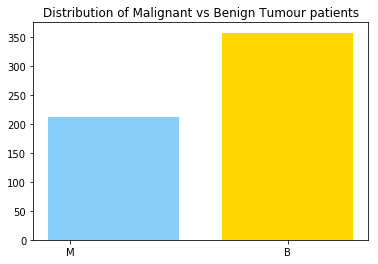

In [57]:
plt.bar( x = [ 0.2,1 ],height =[212,357] ,width=0.6,color=['lightskyblue','gold'] )
plt.xticks(range(2),['M','B'])
plt.title('Distribution of Malignant vs Benign Tumour patients')

In [60]:
data.loc[data['diagnosis'] == 'M','diagnosis'] = 1
data.loc[data['diagnosis'] == 'B','diagnosis'] = 0

In [61]:
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

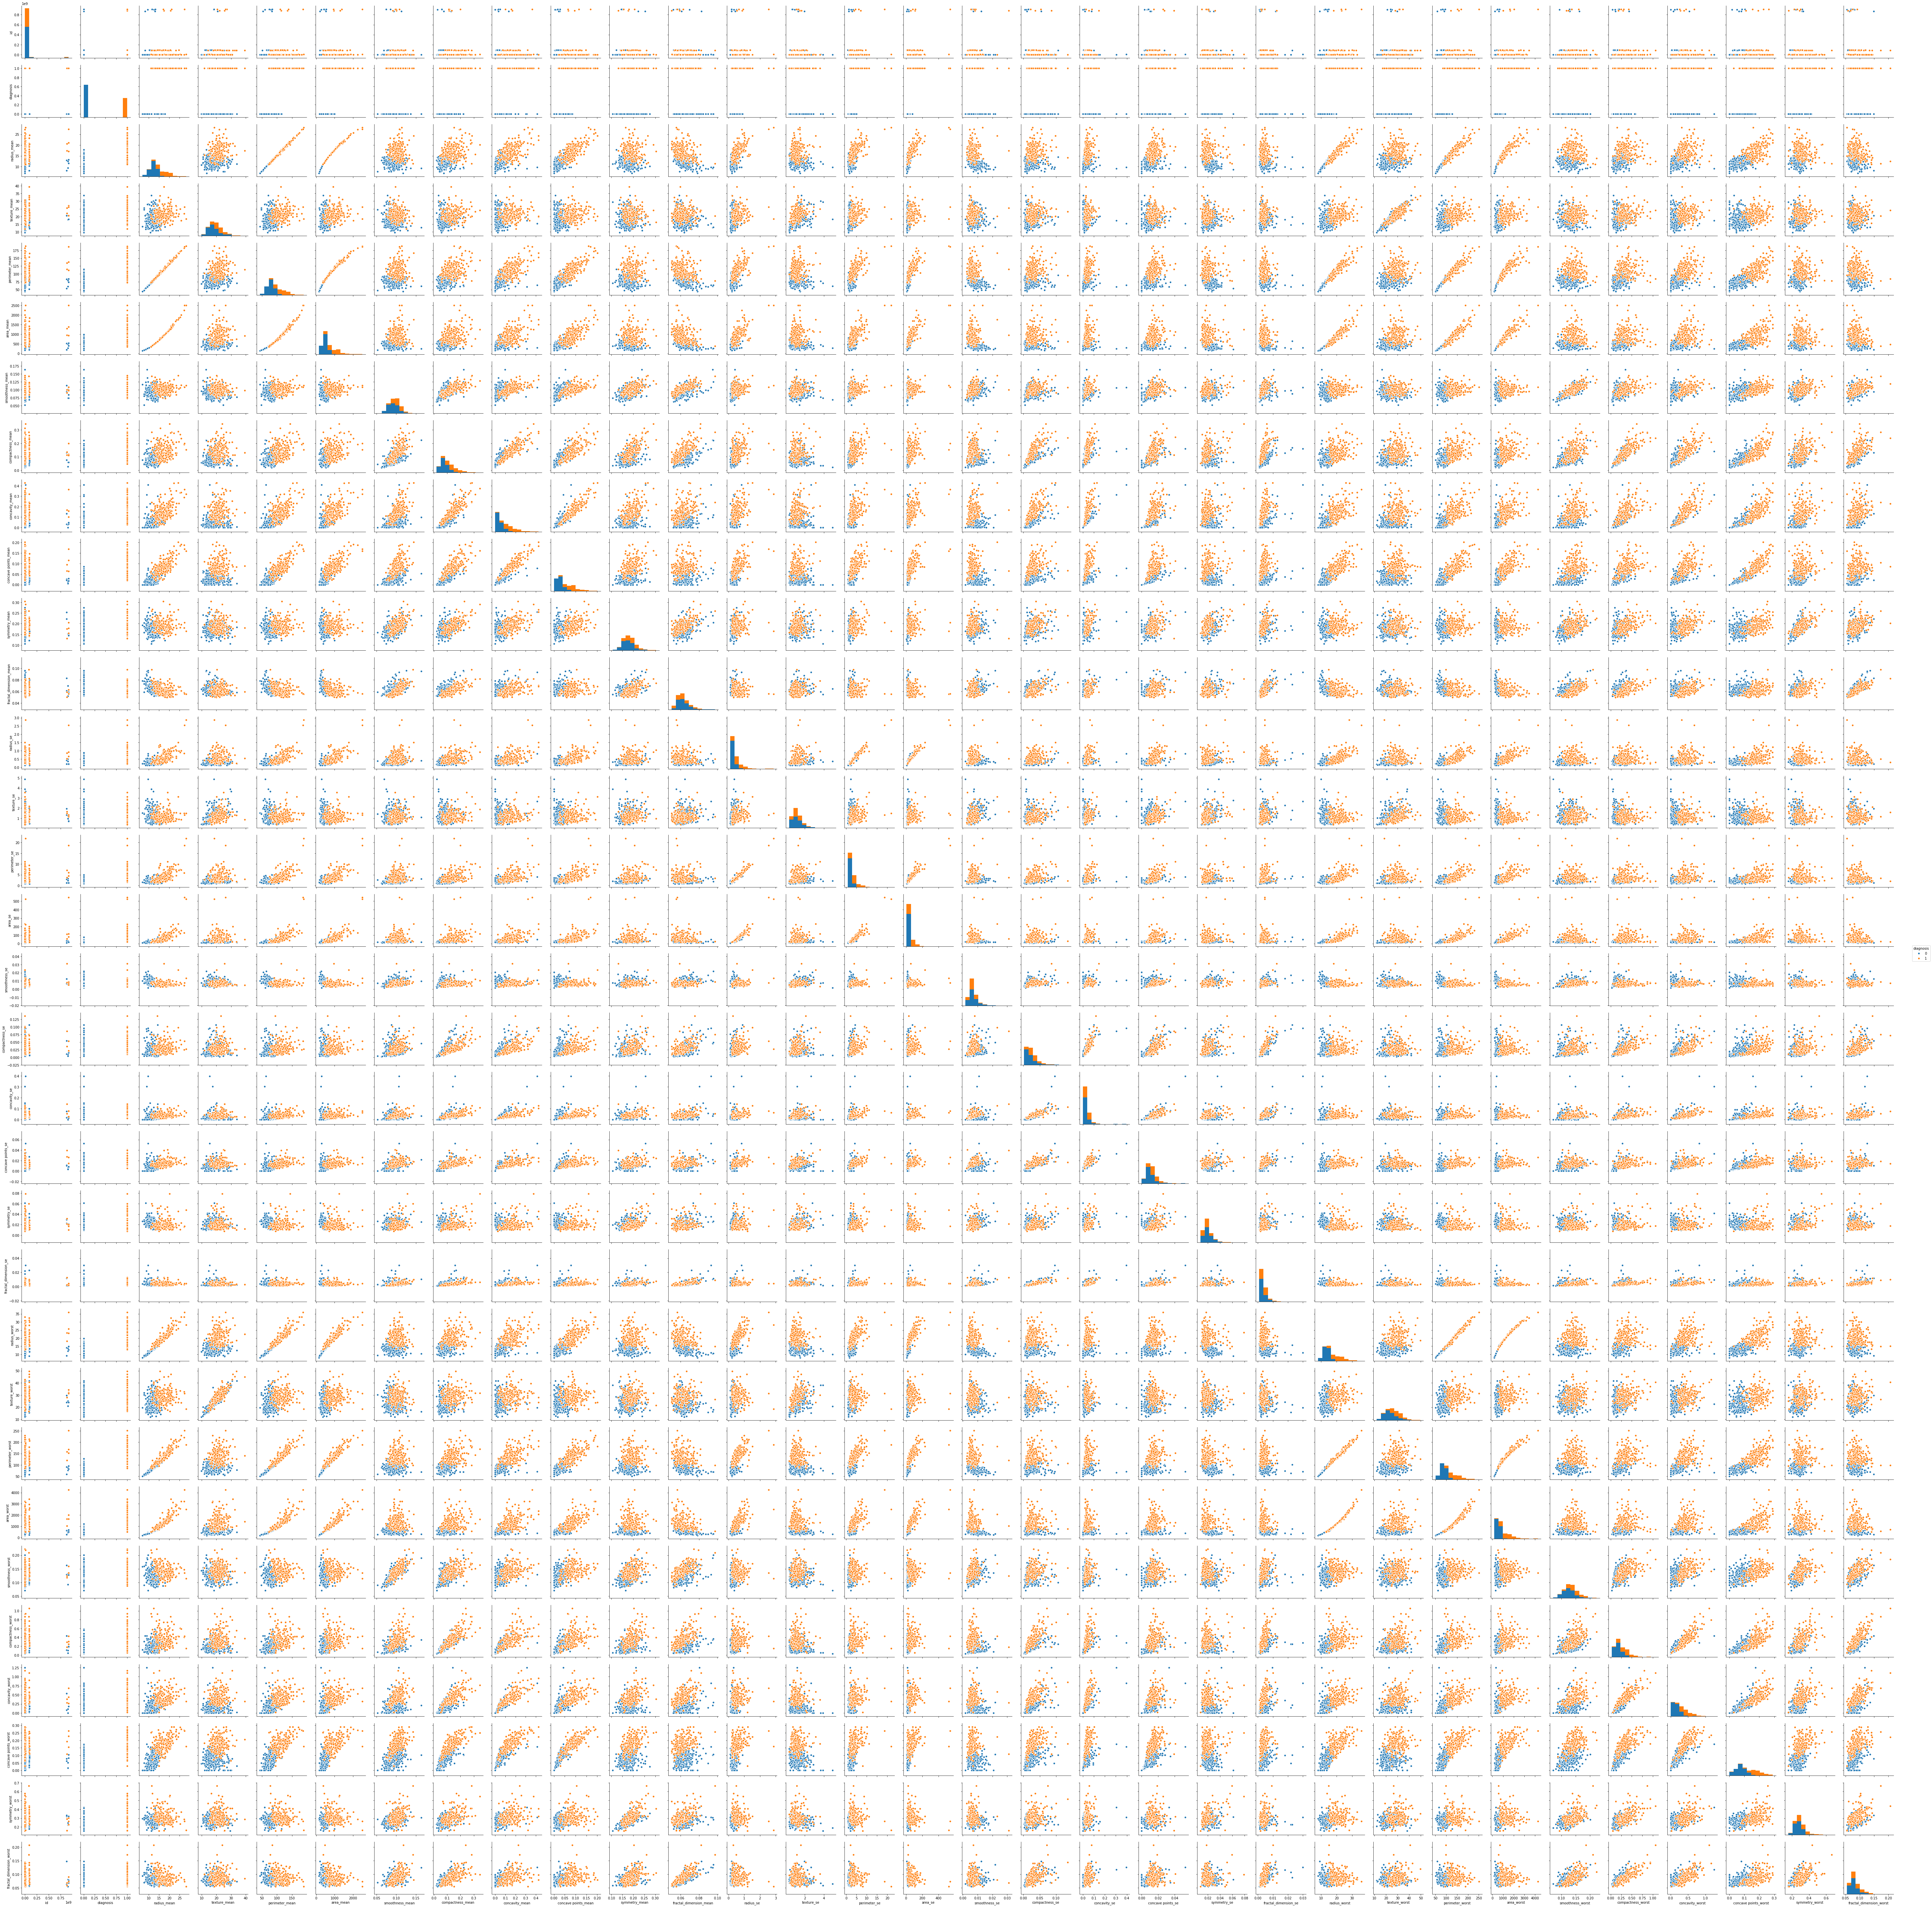

In [62]:
sns.pairplot(data[1:],hue='diagnosis')

### We can see here that many of our features are positively correlated. So we can do dimensionality reduction to get rid of certain features as they increase the computational time. By taking only relevant features, we can easily predict the breast cancer

#### To just verify the correlation, let's build a correlation matrix for all our features

In [63]:
corr = data.corr()

In [65]:
corr.head()

id  diagnosis  radius_mean  texture_mean  \
id              1.000000   0.039769     0.074626      0.099770   
diagnosis       0.039769   1.000000     0.730029      0.415185   
radius_mean     0.074626   0.730029     1.000000      0.323782   
texture_mean    0.099770   0.415185     0.323782      1.000000   
perimeter_mean  0.073159   0.742636     0.997855      0.329533   

                perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
id                    0.073159   0.096893        -0.012968          0.000096   
diagnosis             0.742636   0.708984         0.358560          0.596534   
radius_mean           0.997855   0.987357         0.170581          0.506124   
texture_mean          0.329533   0.321086        -0.023389          0.236702   
perimeter_mean        1.000000   0.986507         0.207278          0.556936   

                concavity_mean  concave points_mean           ...             \
id                    0.050080             0.044158           ...              
diagnosis             0.696360             0.776614           ...              
radius_mean           0.676764             0.822529           ...              
texture_mean          0.302418             0.293464           ...              
perimeter_mean        0.716136             0.850977           ...              

                radius_worst  texture_worst  perimeter_worst  area_worst  \
id                  0.082405       0.064720         0.079986    0.107187   
diagnosis           0.776454       0.456903         0.782914    0.733825   
radius_mean         0.969539       0.297008         0.965137    0.941082   
texture_mean        0.352573       0.912045         0.358040    0.343546   
perimeter_mean      0.969476       0.303038         0.970387    0.941550   

                smoothness_worst  compactness_worst  concavity_worst  \
id                      0.010338          -0.002968         0.023203   
diagnosis               0.421465           0.590998         0.659610   
radius_mean             0.119616           0.413463         0.526911   
texture_mean            0.077503           0.277830         0.301025   
perimeter_mean          0.150549           0.455774         0.563879   

                concave points_worst  symmetry_worst  fractal_dimension_worst  
id                          0.035174       -0.044224                -0.029866  
diagnosis                   0.793566        0.416294                 0.323872  
radius_mean                 0.744214        0.163953                 0.007066  
texture_mean                0.295316        0.105008                 0.119205  
perimeter_mean              0.771241        0.189115                 0.051019  

[5 rows x 32 columns]

### Since there are so many features that have high correlation, we can get rid of some of the features using principal component analysis

## Principal Component Analysis

In [66]:
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [74]:
X = data.ix[:,2:].values

In [75]:
X.shape

(569, 30)

In [76]:
y = data.ix[:,1].values

In [77]:
y.shape

(569,)

In [78]:
X_sd = StandardScaler().fit_transform(X)

In [79]:
X_sd

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [80]:
X_sd.shape

(569, 30)

In [81]:
mean_vec = np.mean(X_sd,axis=0)

In [84]:
mean_vec

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
        1.74825981e-16,  1.99801121e-16,  3.74627101e-17, -3.74627101e-17,
        1.87313551e-16,  4.52674414e-16,  2.49751401e-16, -1.03022453e-16,
       -3.49651961e-16, -1.31119486e-16,  4.40186844e-16,  1.81069766e-16,
        1.62338411e-16,  1.24875700e-17,  8.11692053e-17,  6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.74726541e-16,  2.12288691e-16])

In [85]:
cov_mat = (((X_sd - mean_vec).T).dot(X_sd - mean_vec))/X_sd.shape[0]-1

In [89]:
e_vals,e_vecs = np.linalg.eig(cov_mat)

In [106]:
e_vals.shape

(30,)

In [92]:
e_vecs.shape

(30, 30)

In [95]:
u,s,v = np.linalg.svd(X_sd.T)

In [107]:
e_vals

array([-1.88833616e+01,  6.47342902e+00,  3.39093959e+00,  2.35281468e+00,
        1.78747964e+00,  1.20735793e+00,  6.76157497e-01,  6.26166400e-01,
        4.48660945e-01,  3.61499334e-01,  3.33859771e-01,  2.68779110e-01,
        2.49232155e-01,  1.57028959e-01,  1.25392336e-01,  9.02465054e-02,
        6.16380040e-02,  5.29969875e-02,  4.94824547e-02,  1.45334978e-04,
        7.55784524e-04,  1.60646029e-03,  8.56983013e-03,  7.66288225e-03,
        1.80874606e-02,  1.59771958e-02,  2.49376284e-02,  3.24460564e-02,
        3.01149722e-02,  2.98966928e-02])

In [97]:
s

array([86.93235745, 56.90677266, 40.04263937, 33.57058877, 30.62887007,
       26.2104161 , 19.60102663, 16.46800391, 15.4017255 , 14.12602481,
       12.93205441, 12.19019359, 11.71889139,  9.4519063 ,  7.31866075,
        6.74106325,  5.81360925,  5.47175363,  5.30591648,  4.21066503,
        4.12971871,  3.95133143,  3.72155031,  3.20519874,  2.96796958,
        2.15709923,  1.98150547,  0.95096438,  0.65273958,  0.27514088])

In [128]:
total = sum(abs(e_vals))

In [129]:
normalized = [((i/total)*100) for i in sorted(abs(e_vals),reverse=True)]

In [130]:
e_pairs = [(np.abs(e_vals[i]),e_vecs[:,i]) for i in range(len(e_vals))]

In [131]:
e_pairs.sort()
e_pairs.reverse()

In [134]:
normalized

[49.99999999999997,
 17.14056307724773,
 8.978643889434728,
 6.229861844864608,
 4.732948715715855,
 3.196882939119376,
 1.7903525605359043,
 1.657984455014231,
 1.187979540975726,
 0.9571900940193943,
 0.8840051309330681,
 0.7116823668654452,
 0.6599252816043747,
 0.41578655800278685,
 0.3320180447969897,
 0.23895773229613923,
 0.16320718000457726,
 0.14032720607717514,
 0.13102130783555138,
 0.08591175943252698,
 0.07973943628285188,
 0.07916146880751512,
 0.066030691171416,
 0.04789258655733104,
 0.04230495649694828,
 0.02269148445081162,
 0.020290037348539385,
 0.0042536395844654734,
 0.002001191680921296,
 0.0003848228430492848]

### If we look at the normalized score, the top 9 dimensions have reasonable eigen values whereas the other eigen values are very less. We can consider only the top 6 dimensions

In [140]:
matrix_w = np.hstack((e_pairs[0][1].reshape(30,1),e_pairs[1][1].reshape(30,1),e_pairs[2][1].reshape(30,1),e_pairs[3][1].reshape(30,1),e_pairs[4][1].reshape(30,1),e_pairs[5][1].reshape(30,1)))

In [143]:
X_sd

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [144]:
X_new = X_sd.dot(matrix_w)

In [146]:
X_new.shape

(569, 6)

In [147]:
X_sd.shape

(569, 30)

In [169]:
df = pd.DataFrame()
df["PC1"] = X_new[:,0]
df["PC2"] = X_new[:,1]
df["PC3"] = X_new[:,2]
df["PC4"] = X_new[:,3]
df["PC5"] = X_new[:,4]
df["PC6"] = X_new[:,5]

In [170]:
df.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  7.443495  2.382756  5.060646 -3.148548  2.459962 -1.413241
1  0.860518  4.440073  0.200678 -0.404472  0.328328 -0.026037
2  4.240736  3.417806  2.001405 -0.999079  0.415538 -0.542261
3  9.163565 -6.279032  6.861096  0.641984  2.041223 -3.058843
4  2.461525  3.451668  0.420066 -3.289994  0.975040  1.228380

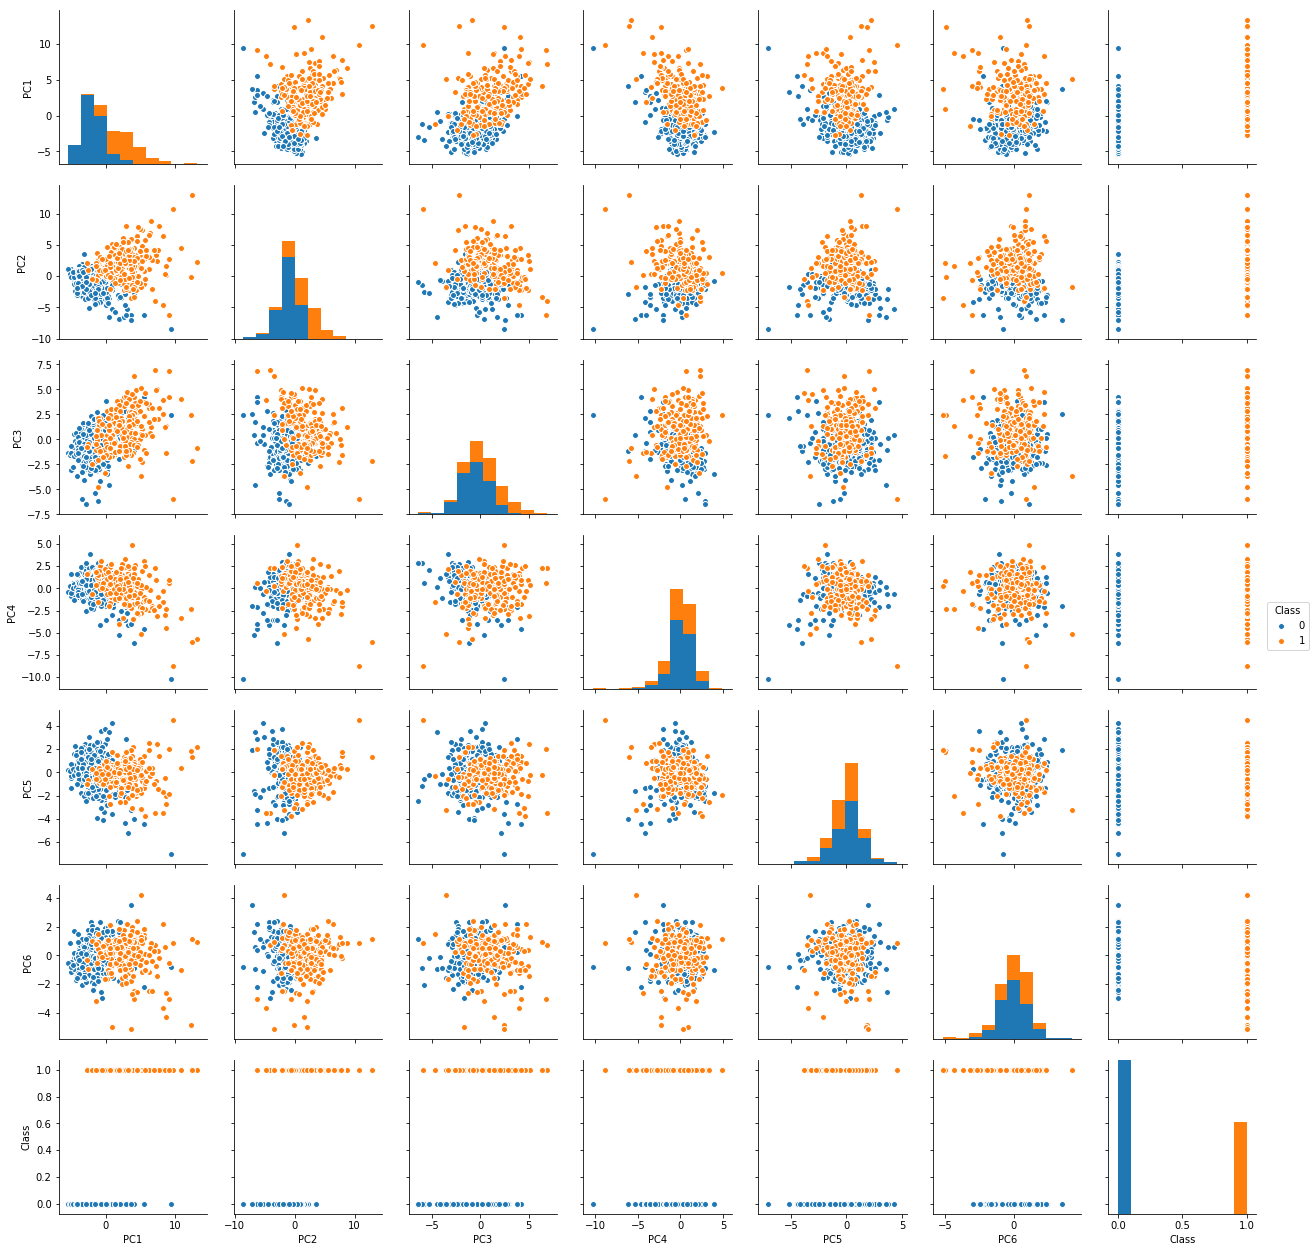

In [155]:
sns.pairplot(df,hue='Class')

## Let's perform logistic regression on this dataset and predict the possibility of breast cancer.

In [156]:
def sigmoid(scores):
    return 1/(1 + np.exp(-scores))

In [157]:
def log_likelihood(features,target,weights):
    scores = np.dot(features,weights)
    log_like = np.sum(target*scores - np.log(1 + np.exp(scores)))
    return log_like

In [191]:
def logistic_regression(features,target,num_steps,learning_rate,add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0],1))
        features = np.hstack((intercept,features))
    weights = np.zeros(features.shape[1])
    for step in range(num_steps):
        scores = np.dot(features,weights)
        predictions = sigmoid(scores)
        
        output_error = target - predictions
        gradient = np.dot(features.T,output_error)
        weights += learning_rate*gradient
        
        if step%10000 == 0:
            print(log_likelihood(features,target,weights))
    return weights

In [180]:
features = np.array(df)

In [181]:
target = np.array(y)

In [174]:
target.shape

(569,)

In [185]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2)

In [186]:
features_train.shape

(455, 6)

In [187]:
features_test.shape

(114, 6)

In [189]:
target_train.shape,target_test.shape

((455,), (114,))

In [193]:
weights = logistic_regression(features_train,target_train,30000,0.01,add_intercept=True)

-176.0993213164722
-35.495815398700785
-35.495815398700785


In [194]:
weights

array([-0.34973506,  2.39348068,  2.37683222,  0.01824359,  1.29066557,
        0.89393852,  0.50938138])

In [199]:
data_with_intercept = np.hstack((np.ones((features_test.shape[0],1)),features_test))

In [200]:
final_scores = np.dot(data_with_intercept,weights)

In [201]:
predictions = np.round(sigmoid(final_scores))

In [210]:
(predictions == target_test).sum()/len(predictions)

1.0